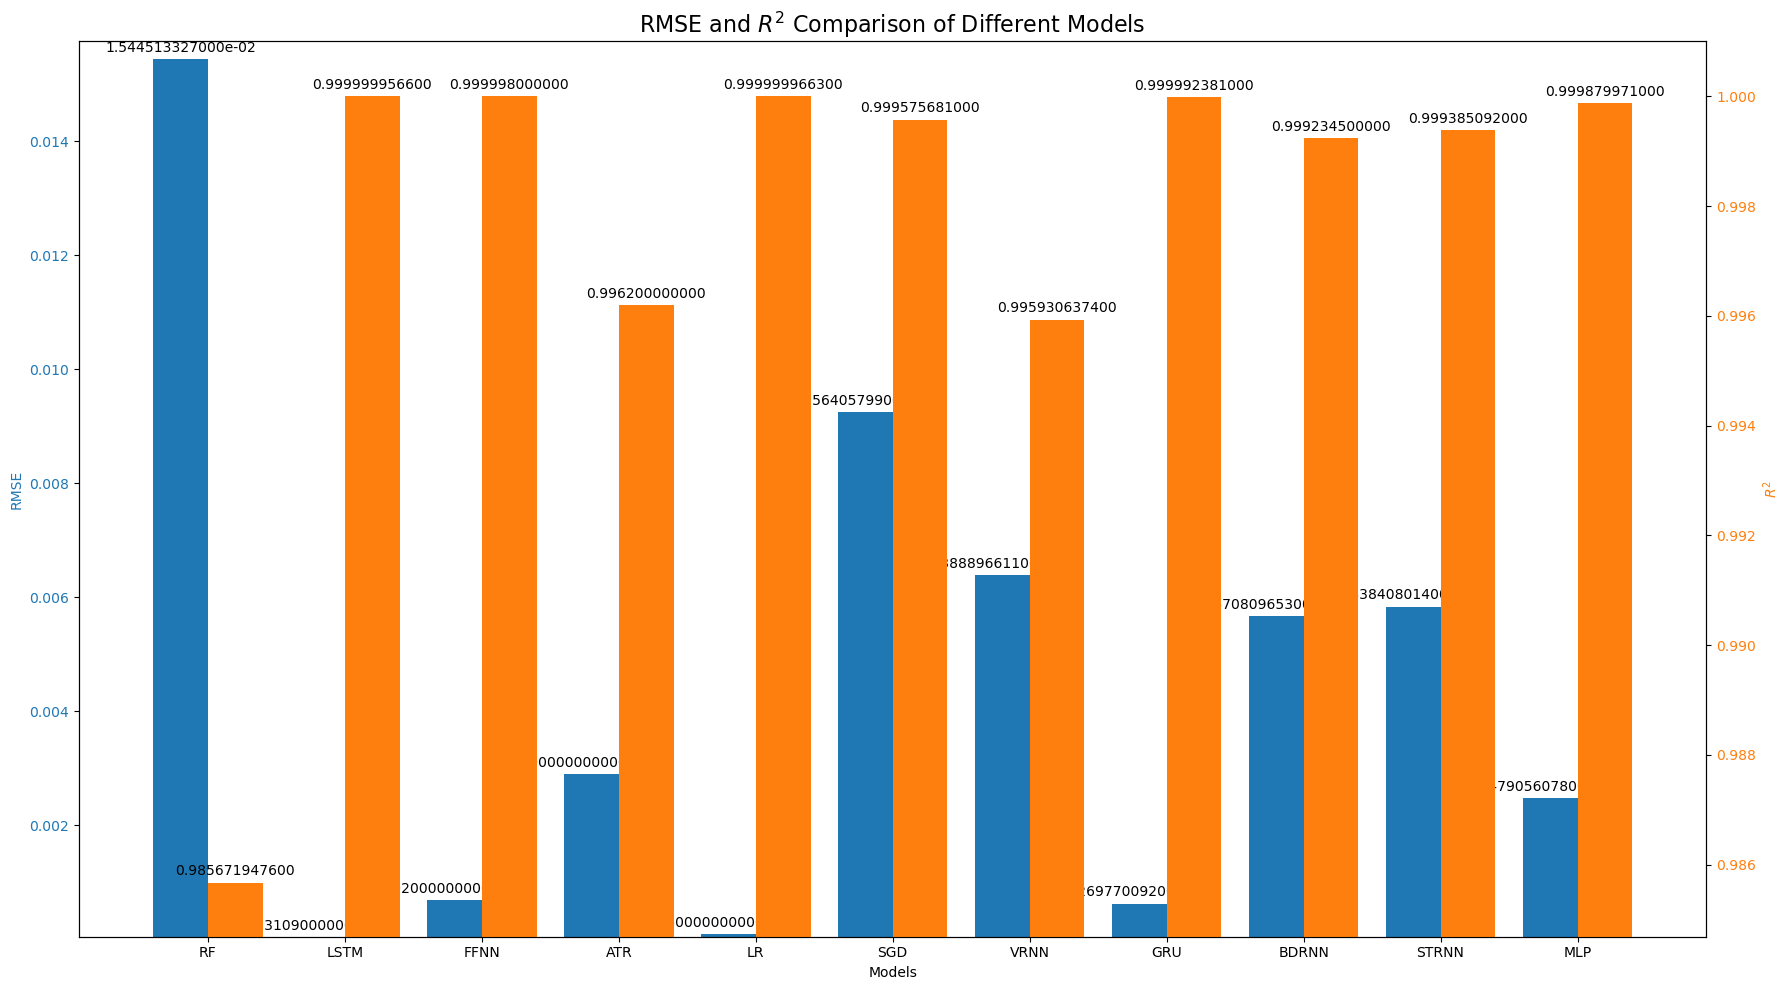

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from CSV
data = pd.read_csv('model_performance.csv')

# Extract columns
models = data['Model']
rmse = data['RMSE']
r_squared = data['R2']

# Convert to numpy arrays for convenience
x = np.arange(len(models))

# Create figure and axis with increased size
fig, ax1 = plt.subplots(figsize=(18, 10))

# Plot RMSE
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color=color)
bars1 = ax1.bar(x - 0.2, rmse, 0.4, color=color, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Set y-axis limits for RMSE based on the data range
ax1.set_ylim([min(rmse) * 0.98, max(rmse) * 1.02])

# Create another y-axis for R²
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('$R^2$', color=color)
bars2 = ax2.bar(x + 0.2, r_squared, 0.4, color=color, label='$R^2$')
ax2.tick_params(axis='y', labelcolor=color)

# Set y-axis limits for R² close to the range
ax2.set_ylim([min(r_squared) * 0.999, max(r_squared) * 1.001])

# Add labels above the bars with high precision
def add_labels(bars, ax, fmt='{:.12f}'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(fmt.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Use scientific notation for RMSE and more decimals for R²
add_labels(bars1, ax1, '{:.12e}')  # Scientific notation for RMSE
add_labels(bars2, ax2, '{:.12f}')  # More decimal places for R²

# Title and layout
plt.title('RMSE and $R^2$ Comparison of Different Models', fontsize=16)
fig.tight_layout()  # To ensure there's no clipping of labels

plt.show()
